<div>
<img style="float:left; border-radius:50%" src="https://avatars2.githubusercontent.com/u/58553327?s=460&u=3276252f07fb379c248bc8c9ce344bfdcaed7c45&v=4" width="40px">
<a href="https://github.com/carlosholivan"><img src="https://www.sferalabs.cc/wp-content/uploads/github-logo.png" width=70px style="float: right;"></a>
</div>

<a name="top"></a>

# CNN VAE <a name="top"></a>

In this notebook it is described how to compute different time-frequency inputs with <strong>compute_input_from_audiopath</strong> function.

Author: Carlos Hernández Oliván<br>
Last update: 7 November 2020
  

### Table of Contents <a name="index"></a>
 
0. [Check GPU and Troch versions](#checks)

1. [Preprocessing data](#preprocess)

2. [Create Dataloader](#dataloader)

3. [VAE Model](#model)

4. [Run Training](#training)

5. [Visualizining Latent Spaces](#visualizing)

    5.1. [2 Latent dimensions](#2d)

    5.2. [3 latent dimensions](#3d)
    
    5.3. [Animations](#animations)

6. [Reconstruction](#reconstruction)
    
[References](#references)

In [1]:
import glob
import csv
import sys, os.path

import sklearn
import torch
from torch import optim, nn
from torch.utils.data import DataLoader
from torchvision import transforms
#from torch.utils.tensorboard import SummaryWriter
#from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Our modules
import sys
sys.path.append('.')
sys.path.append('..')

from vae import configs, train, plot_utils, models
from vae.data import build_dataloader
from vae.latent_spaces import dimensionality_reduction, plot_spaces
from vae.reconstructions import plot_reconstructions
from vae.models import model_utils
from vae.train import training

## 0. Check GPU and Troch versions<a name="checks"></a>

In [3]:
torch.__version__

'0.4.1.post2'

In [4]:
!lspci | grep -i nvidia

01:00.0 VGA compatible controller: NVIDIA Corporation GM200 [GeForce GTX 980 Ti] (rev a1)
01:00.1 Audio device: NVIDIA Corporation GM200 High Definition Audio (rev a1)


!sudo apt install nvidia-cuda-toolkit

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
!nvidia-smi

Tue Apr 13 08:50:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 980 Ti  Off  | 00000000:01:00.0 Off |                  N/A |
| 32%   63C    P0    71W / 250W |     48MiB /  6080MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

## 4. RUN TRAINING <a name="training"></a>

In [8]:
tensorboard = False
if tensorboard:
    # Load the TensorBoard notebook extension
    %load_ext tensorboard
    %tensorboard --logdir ../runs

Building dataloaders...
Dataloaders have been built.
Number of files in the training dataset: 11630
Number of files in the validation dataset: 1357


  0%|          | 0/727 [00:00<?, ?it/s]

Start training model on cuda ...
Epoch: 0


100%|██████████| 727/727 [01:39<00:00,  7.63it/s]

training_avg_loss=19443.10
 training_avg_kld=240.16
 training_avg_rec=18242.28



val_avg_loss=11470.15



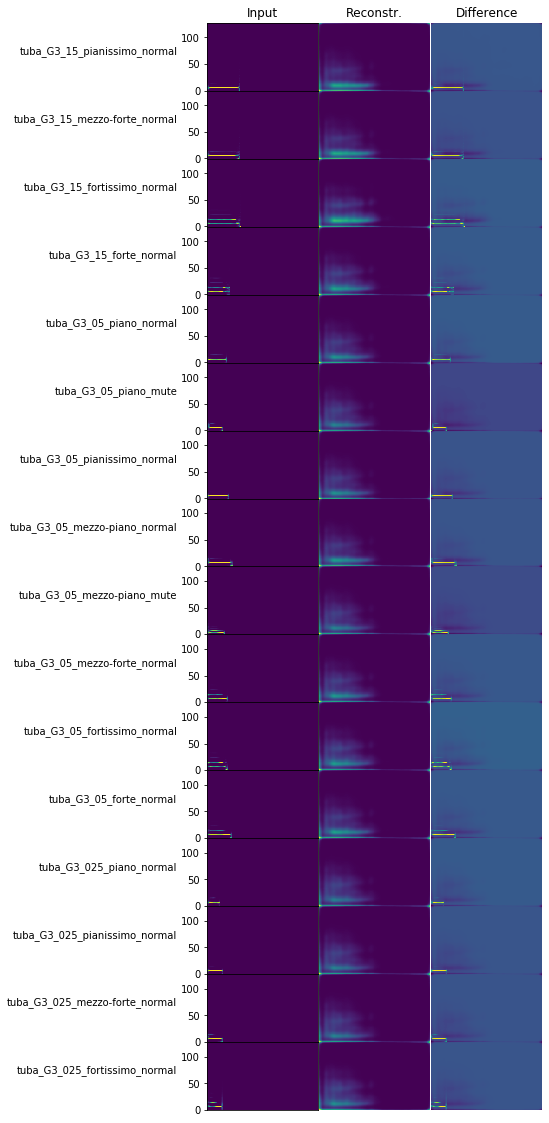

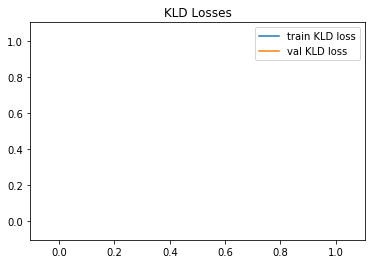

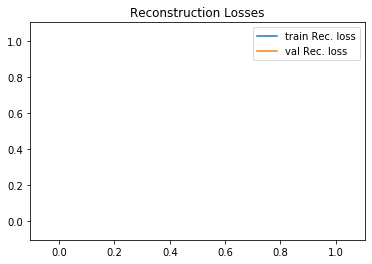

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 1


100%|██████████| 727/727 [01:40<00:00,  7.53it/s]

training_avg_loss=8479.37
 training_avg_kld=125.24
 training_avg_rec=7853.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=9407.69

Epoch: 2


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=8186.47
 training_avg_kld=122.99
 training_avg_rec=7571.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=9255.41

Epoch: 3


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=8007.64
 training_avg_kld=120.71
 training_avg_rec=7404.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=9039.51

Epoch: 4


100%|██████████| 727/727 [01:40<00:00,  7.62it/s]

training_avg_loss=7878.37
 training_avg_kld=121.59
 training_avg_rec=7270.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=9058.86

Epoch: 5


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=7733.78
 training_avg_kld=121.70
 training_avg_rec=7125.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=8922.04

Epoch: 6


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=7620.72
 training_avg_kld=130.76
 training_avg_rec=6966.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=8245.87

Epoch: 7


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=7472.96
 training_avg_kld=139.52
 training_avg_rec=6775.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=8557.39

Epoch: 8


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=7356.55
 training_avg_kld=146.69
 training_avg_rec=6623.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=8352.48

Epoch: 9


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=7255.60
 training_avg_kld=150.82
 training_avg_rec=6501.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=8282.84

Epoch: 10


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=7170.19
 training_avg_kld=153.44
 training_avg_rec=6403.00



val_avg_loss=8011.66



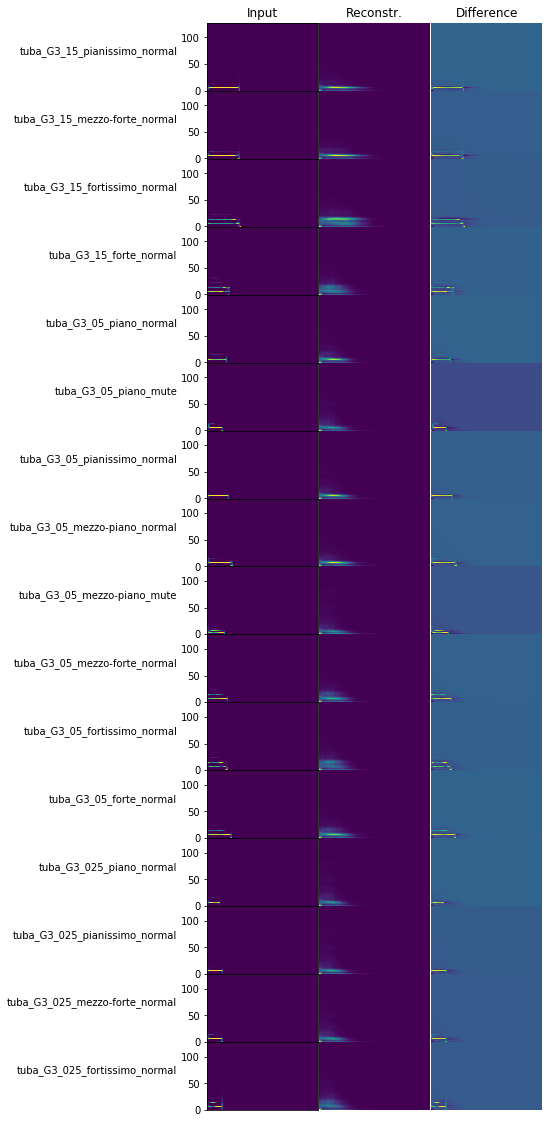

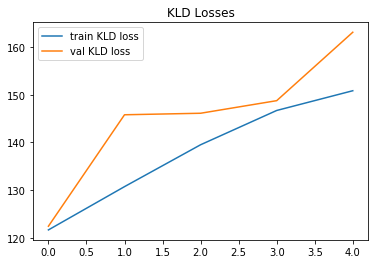

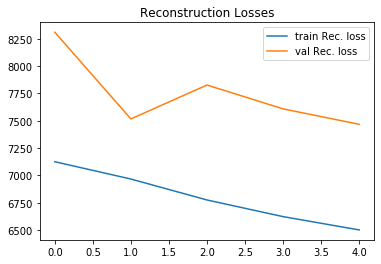

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 11


100%|██████████| 727/727 [01:39<00:00,  7.61it/s]

training_avg_loss=7087.95
 training_avg_kld=155.06
 training_avg_rec=6312.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7945.71

Epoch: 12


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=7020.20
 training_avg_kld=156.79
 training_avg_rec=6236.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7766.59

Epoch: 13


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6963.12
 training_avg_kld=158.24
 training_avg_rec=6171.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=8233.95

Epoch: 14


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6908.49
 training_avg_kld=159.41
 training_avg_rec=6111.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7642.91

Epoch: 15


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6860.08
 training_avg_kld=160.91
 training_avg_rec=6055.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7463.35

Epoch: 16


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6813.34
 training_avg_kld=162.28
 training_avg_rec=6001.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7497.75

Epoch: 17


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6765.52
 training_avg_kld=162.49
 training_avg_rec=5953.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7233.13

Epoch: 18


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6718.28
 training_avg_kld=163.05
 training_avg_rec=5903.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7138.01

Epoch: 19


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6684.73
 training_avg_kld=163.13
 training_avg_rec=5869.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7186.91

Epoch: 20


100%|██████████| 727/727 [01:40<00:00,  7.62it/s]

training_avg_loss=6657.77
 training_avg_kld=164.45
 training_avg_rec=5835.53



val_avg_loss=7291.74



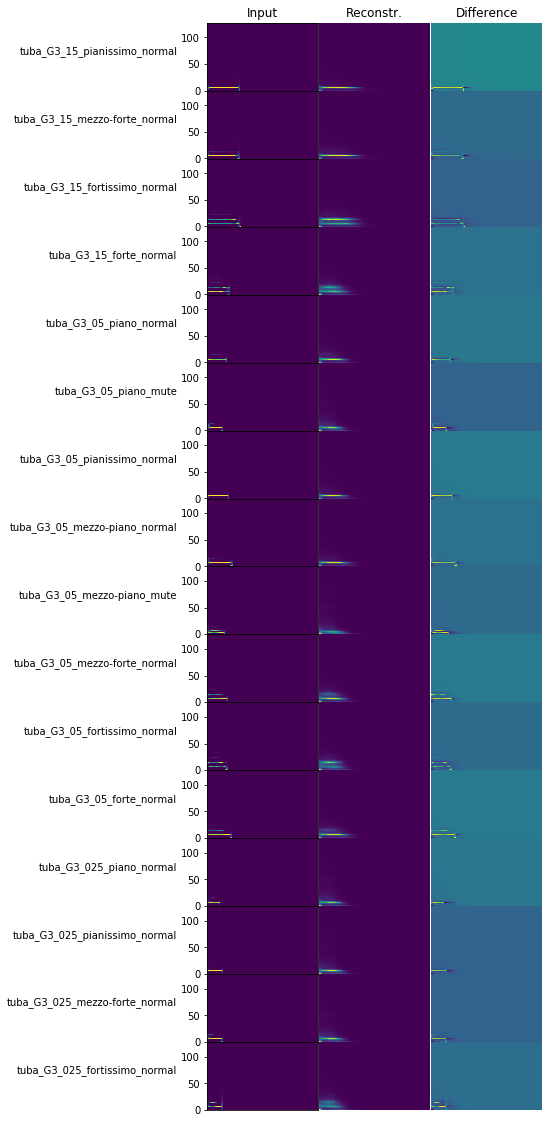

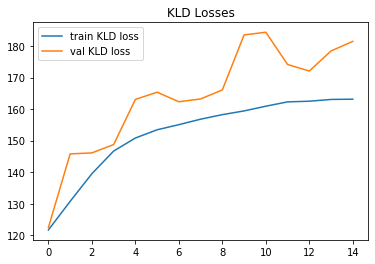

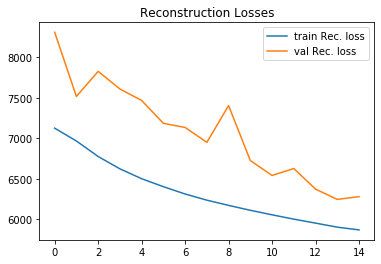

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 21


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6620.45
 training_avg_kld=164.45
 training_avg_rec=5798.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7215.08

Epoch: 22


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6591.77
 training_avg_kld=164.62
 training_avg_rec=5768.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=7058.57

Epoch: 23


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6564.63
 training_avg_kld=165.21
 training_avg_rec=5738.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6938.42

Epoch: 24


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6541.15
 training_avg_kld=164.81
 training_avg_rec=5717.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6997.30

Epoch: 25


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6515.25
 training_avg_kld=165.42
 training_avg_rec=5688.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6962.89

Epoch: 26


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6497.63
 training_avg_kld=165.52
 training_avg_rec=5670.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6818.54

Epoch: 27


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6474.13
 training_avg_kld=165.96
 training_avg_rec=5644.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6692.97

Epoch: 28


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6451.50
 training_avg_kld=165.73
 training_avg_rec=5622.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6789.39

Epoch: 29


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6440.72
 training_avg_kld=165.84
 training_avg_rec=5611.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6816.96

Epoch: 30


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6430.02
 training_avg_kld=166.73
 training_avg_rec=5596.37



val_avg_loss=6698.73



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fe4d2b5dd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle
    return recvfds(s, 1)[0]
  File 

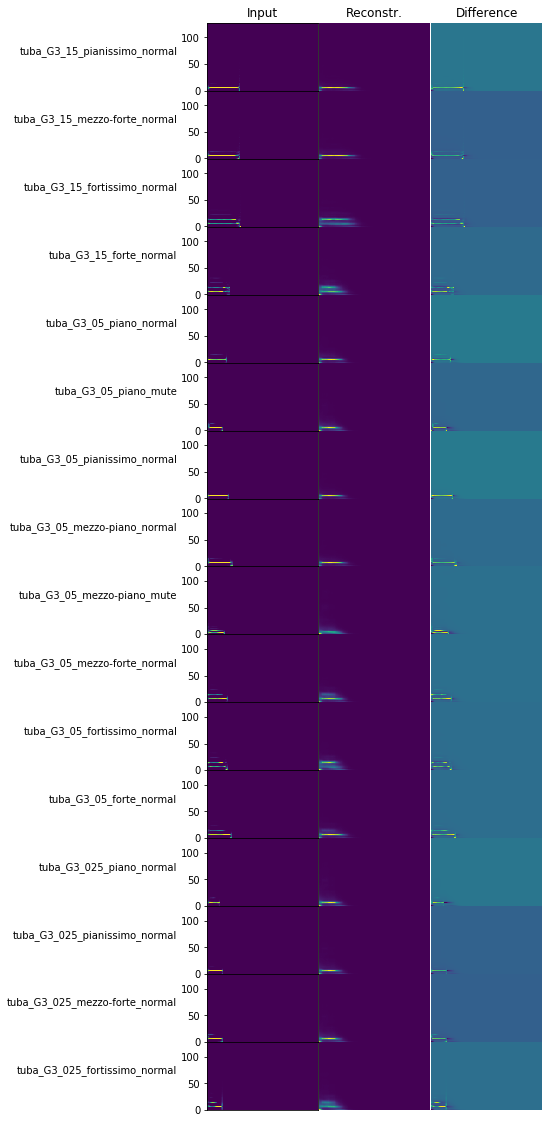

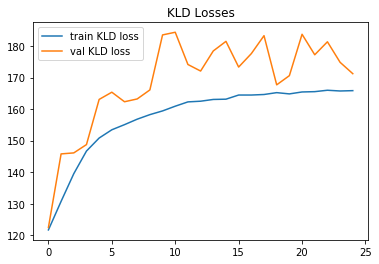

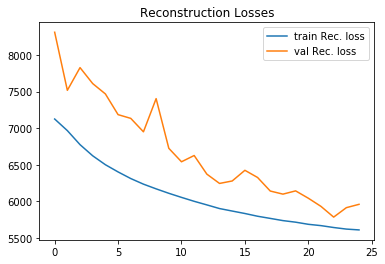

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 31


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6407.10
 training_avg_kld=166.27
 training_avg_rec=5575.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6670.53

Epoch: 32


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6386.77
 training_avg_kld=165.82
 training_avg_rec=5557.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6638.01

Epoch: 33


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6384.89
 training_avg_kld=167.23
 training_avg_rec=5548.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6695.91

Epoch: 34


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=6367.09
 training_avg_kld=166.22
 training_avg_rec=5535.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6734.05

Epoch: 35


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6358.18
 training_avg_kld=166.91
 training_avg_rec=5523.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6605.98

Epoch: 36


100%|██████████| 727/727 [01:40<00:00,  7.62it/s]

training_avg_loss=6348.06
 training_avg_kld=167.21
 training_avg_rec=5512.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6559.84

Epoch: 37


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6335.44
 training_avg_kld=167.31
 training_avg_rec=5498.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6549.91

Epoch: 38


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6321.26
 training_avg_kld=166.77
 training_avg_rec=5487.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6635.42

Epoch: 39


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6319.58
 training_avg_kld=168.06
 training_avg_rec=5479.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6543.14

Epoch: 40


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6304.06
 training_avg_kld=166.85
 training_avg_rec=5469.79



val_avg_loss=6527.81



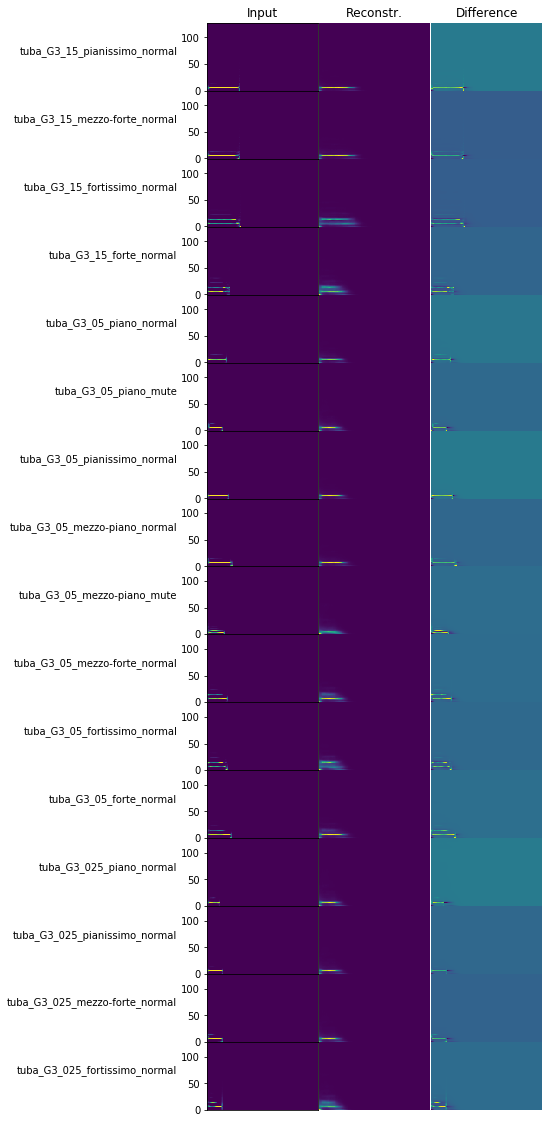

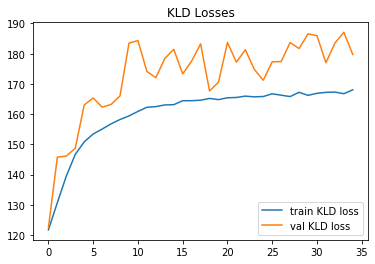

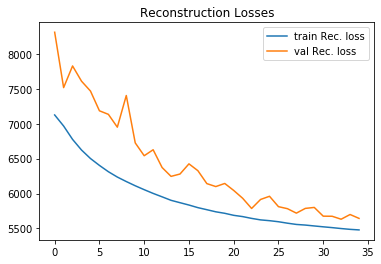

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 41


100%|██████████| 727/727 [01:39<00:00,  7.61it/s]

training_avg_loss=6297.35
 training_avg_kld=167.80
 training_avg_rec=5458.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6484.68

Epoch: 42


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6291.31
 training_avg_kld=167.81
 training_avg_rec=5452.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6563.74

Epoch: 43


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6277.24
 training_avg_kld=167.55
 training_avg_rec=5439.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6546.59

Epoch: 44


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6273.22
 training_avg_kld=167.70
 training_avg_rec=5434.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6490.31

Epoch: 45


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6262.51
 training_avg_kld=168.32
 training_avg_rec=5420.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6501.99

Epoch: 46


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6254.74
 training_avg_kld=168.35
 training_avg_rec=5413.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6489.73

Epoch: 47


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6252.68
 training_avg_kld=169.50
 training_avg_rec=5405.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6500.15

Epoch: 48


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6238.81
 training_avg_kld=168.36
 training_avg_rec=5397.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6488.59

Epoch: 49


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6225.75
 training_avg_kld=168.35
 training_avg_rec=5383.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6420.35

Epoch: 50


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6222.65
 training_avg_kld=169.06
 training_avg_rec=5377.36



val_avg_loss=6467.66



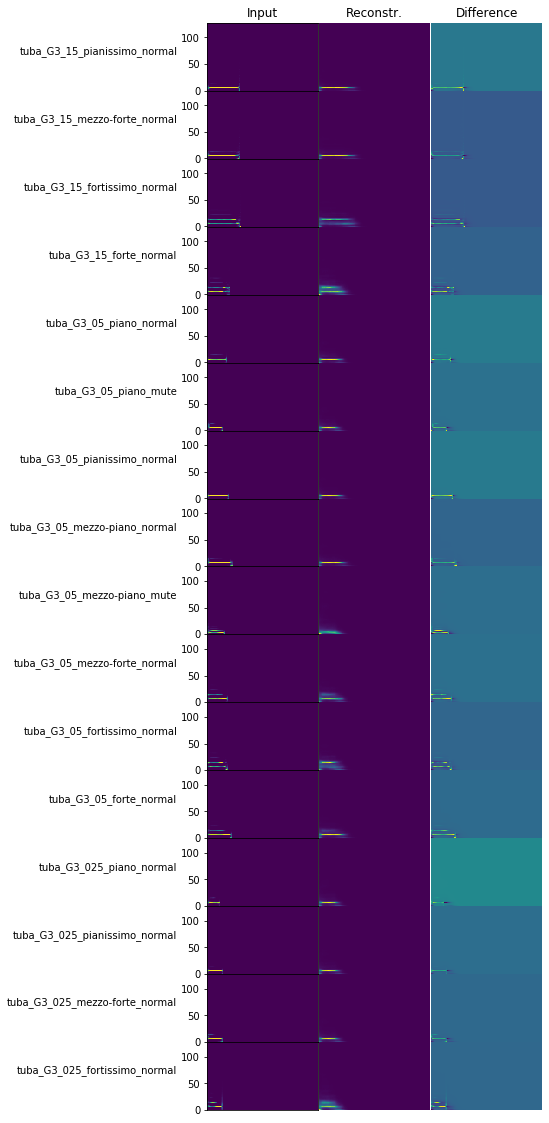

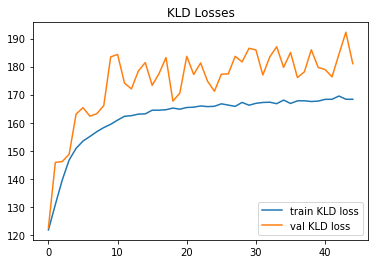

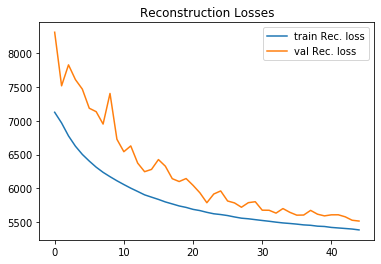

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 51


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6219.33
 training_avg_kld=169.35
 training_avg_rec=5372.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6577.54

Epoch: 52


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6211.82
 training_avg_kld=169.75
 training_avg_rec=5363.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6454.84

Epoch: 53


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6206.37
 training_avg_kld=169.99
 training_avg_rec=5356.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6442.94

Epoch: 54


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6197.65
 training_avg_kld=169.59
 training_avg_rec=5349.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6393.24

Epoch: 55


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6188.57
 training_avg_kld=169.05
 training_avg_rec=5343.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6412.67

Epoch: 56


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6184.83
 training_avg_kld=170.14
 training_avg_rec=5334.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6471.28

Epoch: 57


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6169.59
 training_avg_kld=168.88
 training_avg_rec=5325.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6484.04

Epoch: 58


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6168.59
 training_avg_kld=170.04
 training_avg_rec=5318.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6401.46

Epoch: 59


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6168.43
 training_avg_kld=171.36
 training_avg_rec=5311.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6386.47

Epoch: 60


100%|██████████| 727/727 [01:40<00:00,  7.62it/s]

training_avg_loss=6160.47
 training_avg_kld=170.42
 training_avg_rec=5308.39



val_avg_loss=6405.17



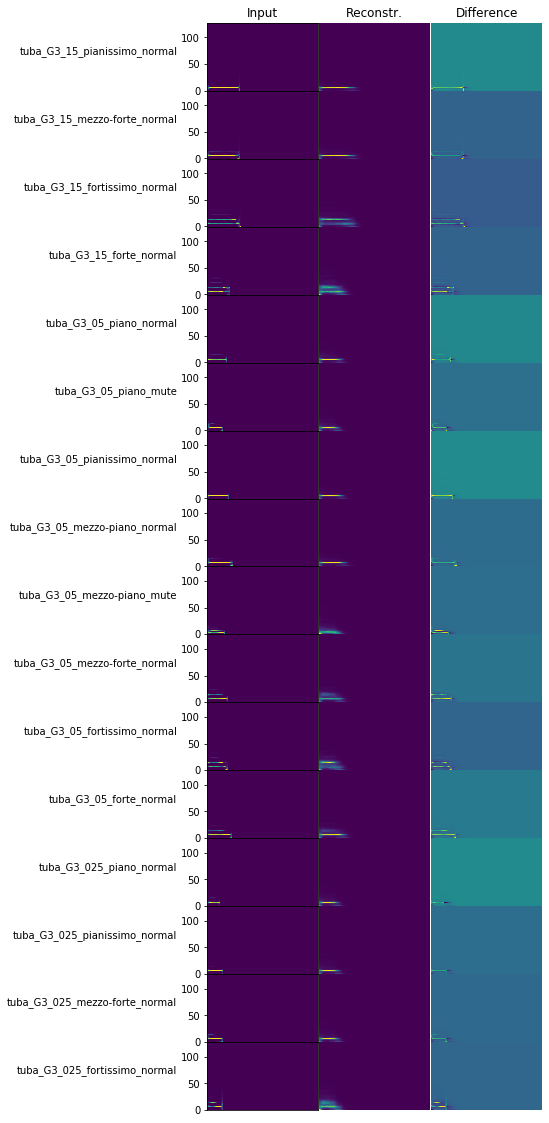

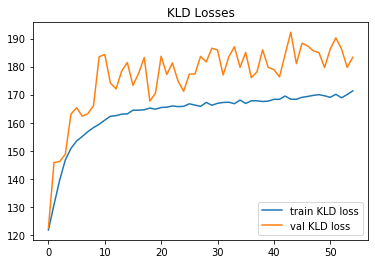

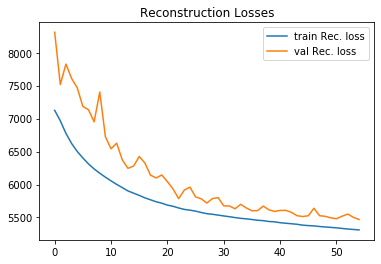

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 61


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6155.28
 training_avg_kld=170.17
 training_avg_rec=5304.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6392.48

Epoch: 62


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6148.62
 training_avg_kld=170.80
 training_avg_rec=5294.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6376.70

Epoch: 63


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6149.50
 training_avg_kld=171.56
 training_avg_rec=5291.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6406.63

Epoch: 64


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6130.39
 training_avg_kld=170.41
 training_avg_rec=5278.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6374.02

Epoch: 65


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6124.92
 training_avg_kld=170.45
 training_avg_rec=5272.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6383.02

Epoch: 66


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6127.64
 training_avg_kld=171.28
 training_avg_rec=5271.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6419.85

Epoch: 67


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6119.01
 training_avg_kld=170.57
 training_avg_rec=5266.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6423.41

Epoch: 68


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6114.92
 training_avg_kld=171.16
 training_avg_rec=5259.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6378.50

Epoch: 69


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6107.95
 training_avg_kld=170.30
 training_avg_rec=5256.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6310.82

Epoch: 70


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6103.74
 training_avg_kld=170.83
 training_avg_rec=5249.57



val_avg_loss=6331.70



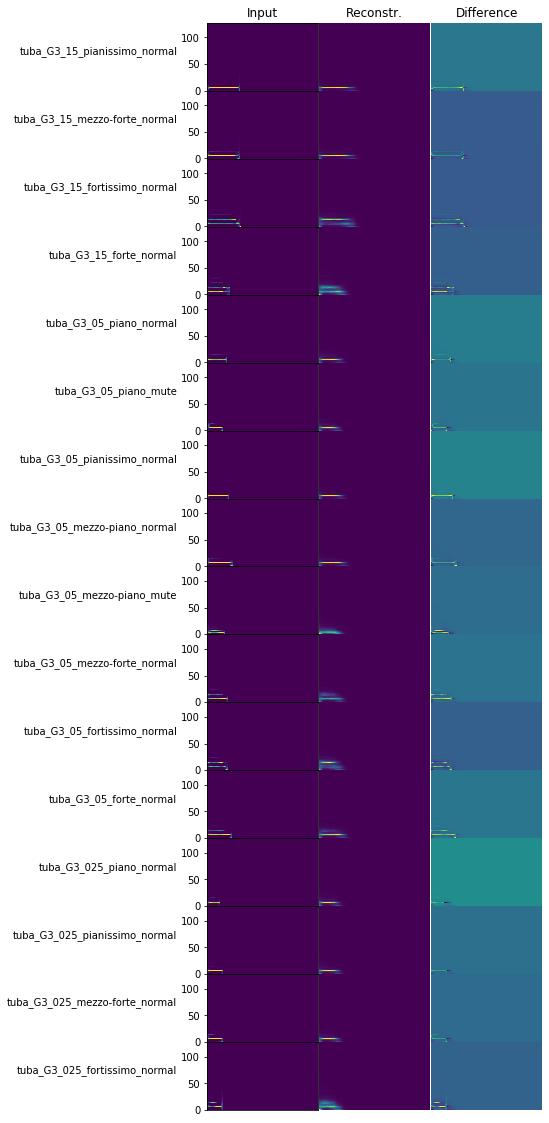

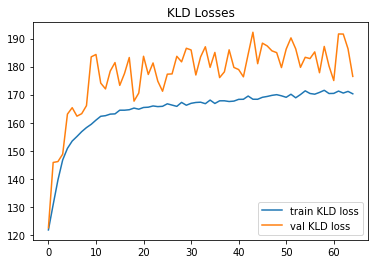

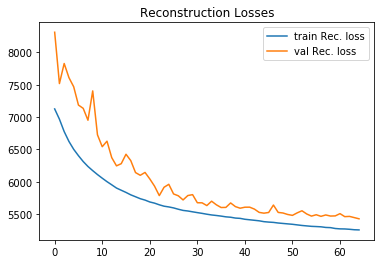

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 71


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6099.01
 training_avg_kld=171.18
 training_avg_rec=5243.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6355.61

Epoch: 72


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6097.49
 training_avg_kld=171.02
 training_avg_rec=5242.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6304.42

Epoch: 73


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6086.95
 training_avg_kld=170.65
 training_avg_rec=5233.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6347.25

Epoch: 74


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6086.93
 training_avg_kld=171.32
 training_avg_rec=5230.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6382.70

Epoch: 75


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6080.43
 training_avg_kld=171.66
 training_avg_rec=5222.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6341.90

Epoch: 76


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6078.00
 training_avg_kld=171.51
 training_avg_rec=5220.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6379.74

Epoch: 77


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6072.28
 training_avg_kld=172.31
 training_avg_rec=5210.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6325.87

Epoch: 78


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6074.39
 training_avg_kld=172.54
 training_avg_rec=5211.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6367.14

Epoch: 79


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6064.41
 training_avg_kld=171.48
 training_avg_rec=5207.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6384.27

Epoch: 80


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6058.22
 training_avg_kld=171.78
 training_avg_rec=5199.32



val_avg_loss=6401.11



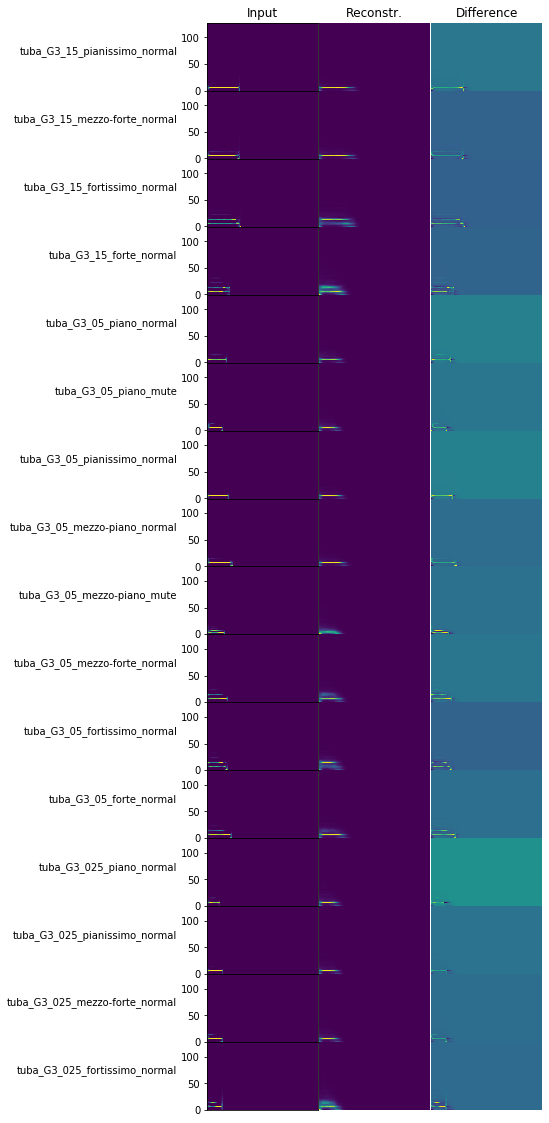

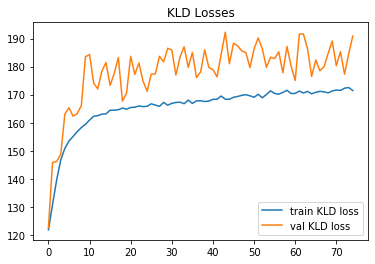

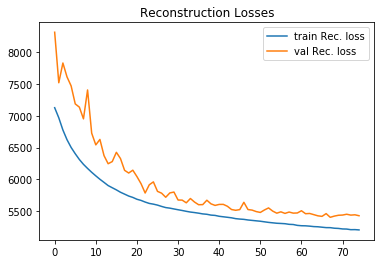

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 81


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6058.59
 training_avg_kld=172.37
 training_avg_rec=5196.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6316.57

Epoch: 82


100%|██████████| 727/727 [01:40<00:00,  7.53it/s]

training_avg_loss=6056.09
 training_avg_kld=172.66
 training_avg_rec=5192.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6349.12

Epoch: 83


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6052.72
 training_avg_kld=172.45
 training_avg_rec=5190.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6365.01

Epoch: 84


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6042.18
 training_avg_kld=172.09
 training_avg_rec=5181.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6307.64

Epoch: 85


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6043.94
 training_avg_kld=172.64
 training_avg_rec=5180.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6371.43

Epoch: 86


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6040.23
 training_avg_kld=172.83
 training_avg_rec=5176.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6361.77

Epoch: 87


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6032.97
 training_avg_kld=172.79
 training_avg_rec=5169.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6359.67

Epoch: 88


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6028.03
 training_avg_kld=172.27
 training_avg_rec=5166.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6343.43

Epoch: 89


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6029.52
 training_avg_kld=172.75
 training_avg_rec=5165.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6349.60

Epoch: 90


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=6021.49
 training_avg_kld=172.24
 training_avg_rec=5160.28



val_avg_loss=6300.07



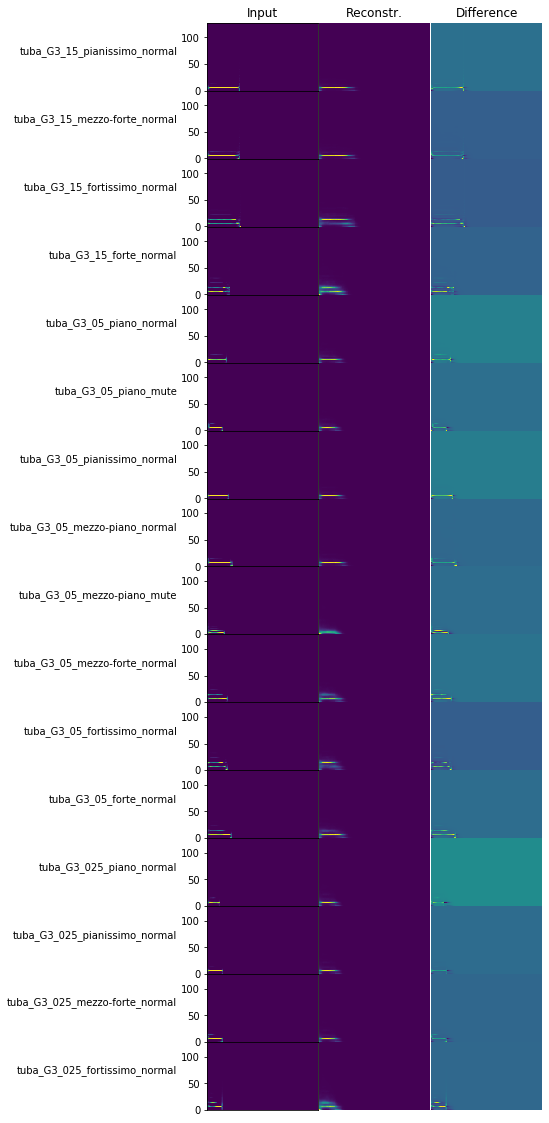

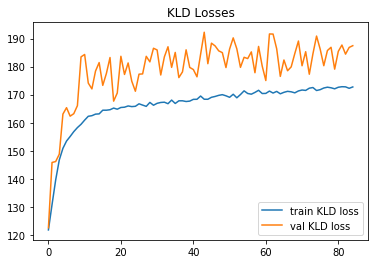

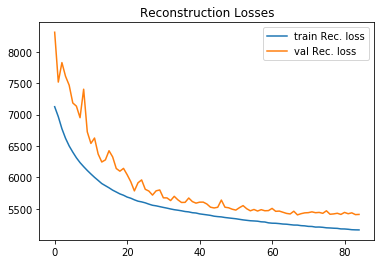

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 91


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6015.19
 training_avg_kld=172.11
 training_avg_rec=5154.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6384.71

Epoch: 92


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6019.34
 training_avg_kld=173.08
 training_avg_rec=5153.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6337.75

Epoch: 93


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6014.18
 training_avg_kld=172.37
 training_avg_rec=5152.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6342.45

Epoch: 94


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6011.14
 training_avg_kld=173.23
 training_avg_rec=5145.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6380.26

Epoch: 95


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=6006.37
 training_avg_kld=172.95
 training_avg_rec=5141.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6287.15

Epoch: 96


100%|██████████| 727/727 [01:40<00:00,  7.62it/s]

training_avg_loss=6002.39
 training_avg_kld=173.04
 training_avg_rec=5137.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6348.04

Epoch: 97


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5998.30
 training_avg_kld=172.54
 training_avg_rec=5135.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6354.52

Epoch: 98


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5998.23
 training_avg_kld=173.48
 training_avg_rec=5130.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6351.40

Epoch: 99


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5996.80
 training_avg_kld=173.44
 training_avg_rec=5129.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6354.36

Epoch: 100


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5993.02
 training_avg_kld=173.76
 training_avg_rec=5124.23



val_avg_loss=6339.10



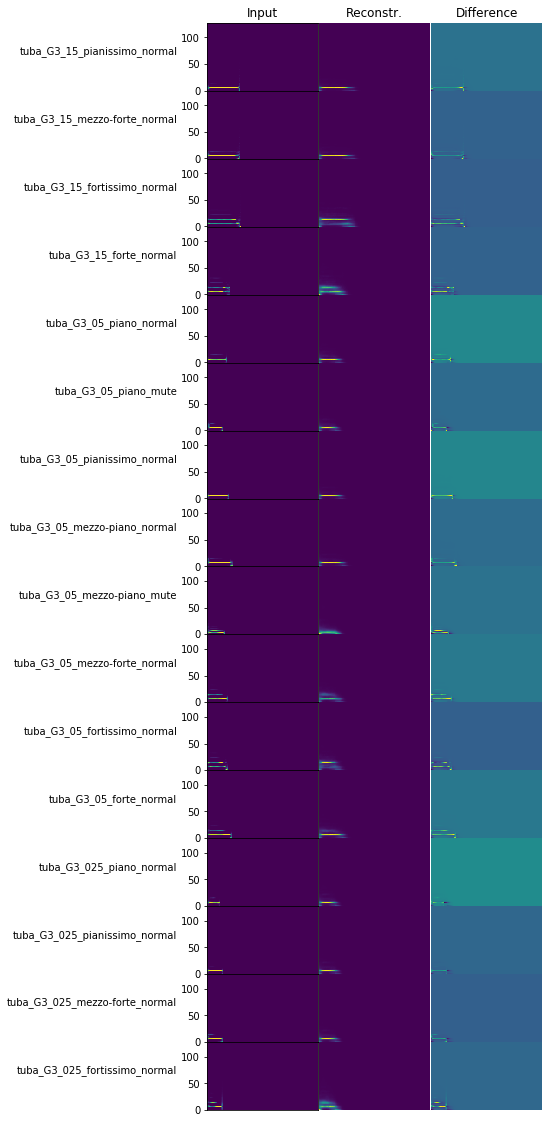

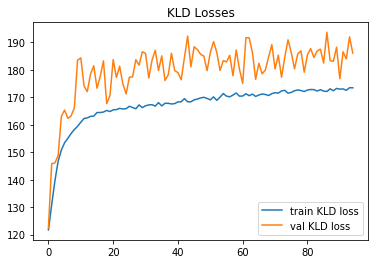

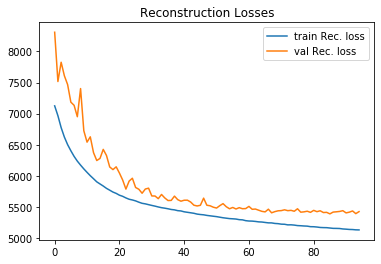

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 101


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5987.07
 training_avg_kld=172.77
 training_avg_rec=5123.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6330.29

Epoch: 102


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5983.70
 training_avg_kld=173.02
 training_avg_rec=5118.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6289.52

Epoch: 103


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5974.32
 training_avg_kld=172.42
 training_avg_rec=5112.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6349.58

Epoch: 104


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5972.88
 training_avg_kld=172.90
 training_avg_rec=5108.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6345.05

Epoch: 105


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5976.32
 training_avg_kld=173.61
 training_avg_rec=5108.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6354.78

Epoch: 106


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5972.65
 training_avg_kld=173.59
 training_avg_rec=5104.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6321.75

Epoch: 107


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5967.88
 training_avg_kld=173.43
 training_avg_rec=5100.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6360.65

Epoch: 108


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5967.01
 training_avg_kld=173.60
 training_avg_rec=5099.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6344.16

Epoch: 109


100%|██████████| 727/727 [01:40<00:00,  7.60it/s]

training_avg_loss=5962.22
 training_avg_kld=173.19
 training_avg_rec=5096.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6319.87

Epoch: 110


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5956.95
 training_avg_kld=173.25
 training_avg_rec=5090.69



val_avg_loss=6295.47



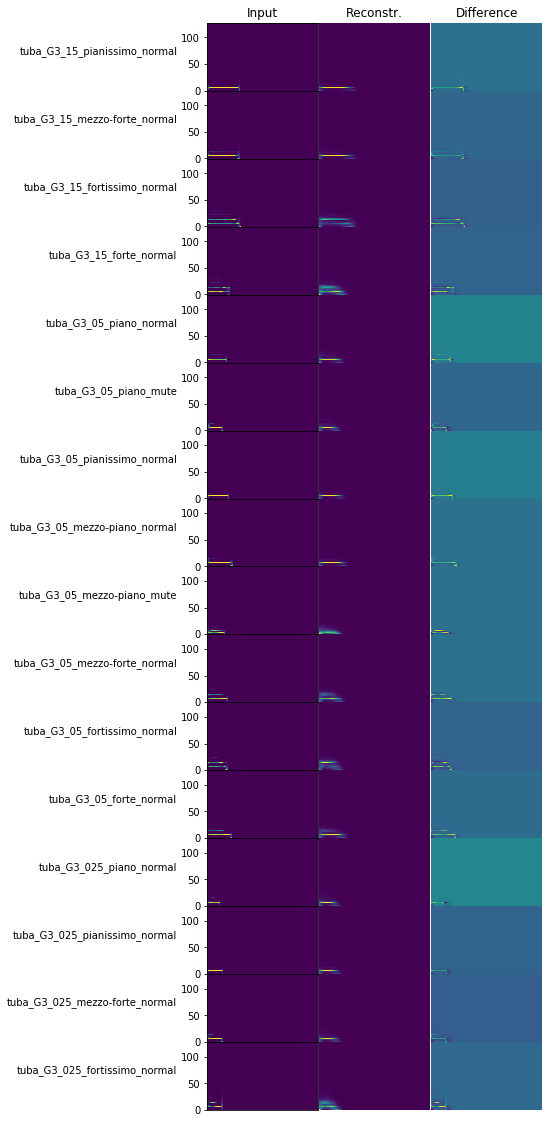

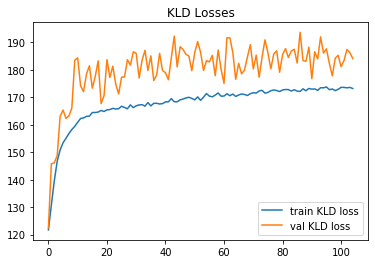

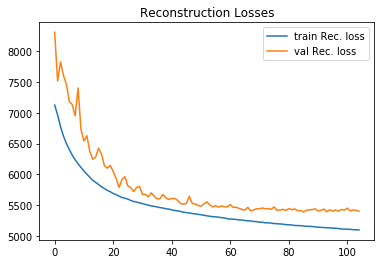

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 111


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5952.45
 training_avg_kld=172.61
 training_avg_rec=5089.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6315.01

Epoch: 112


100%|██████████| 727/727 [01:40<00:00,  7.61it/s]

training_avg_loss=5952.68
 training_avg_kld=172.68
 training_avg_rec=5089.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6315.75

Epoch: 113


100%|██████████| 727/727 [01:40<00:00,  7.52it/s]

training_avg_loss=5953.52
 training_avg_kld=173.95
 training_avg_rec=5083.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=6356.71

Epoch: 114


  9%|▊         | 63/727 [00:09<01:31,  7.28it/s]Process Process-2406:
Process Process-2408:
Process Process-2402:
Process Process-2409:
Process Process-2401:
Process Process-2407:
Process Process-2404:
Process Process-2405:
Process Process-2403:
Traceback (most recent call last):
Process Process-2410:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/carloshernan/anaconda3/

  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/selectors.py",

KeyboardInterrupt: 

In [9]:
training.train_model(input='mel', model_name='TimeConv2D', loss_f='bce')

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>

<button type="button" class="btn btn-primary" style="float:right; background-color:#BA55D3; border:0"><a href="2-chord_prediction.ipynb" style="color:white; text-decoration: none">Go to Chord Detection ⇒</a></button>
    
</div>